In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from textblob import TextBlob

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer 
from nltk.stem import PorterStemmer, LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Looking at the data + visualizations

In [3]:
myDF = pd.read_csv(r"C:\Users\Raunak\Downloads\archive (1)\Womens Clothing E-Commerce Reviews.csv")

In [4]:
myDF.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
myDF.tail()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses
23485,23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses


In [6]:
myDF.shape

(23486, 11)

In [7]:
print(myDF.columns)

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')


In [8]:
myDF.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [9]:
print(myDF['Age'].max())
print(myDF['Age'].min())

99
18


count    23486.000000
mean        43.198544
std         12.279544
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64


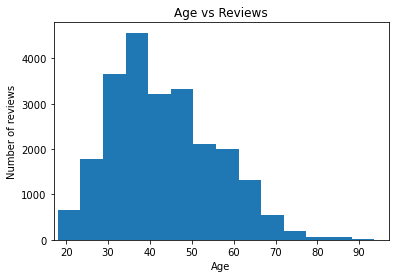

In [10]:
# Distribution of age vs number of reviews
print(myDF['Age'].describe())
plt.hist(myDF['Age'], bins = 15)
plt.title('Age vs Reviews')
plt.xlabel('Age')
plt.xlim(17, 97)
plt.ylabel('Number of reviews')
plt.show()

In [11]:
print(myDF['Rating'].max())
print(myDF['Rating'].min())

5
1


count    23486.000000
mean         4.196032
std          1.110031
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64


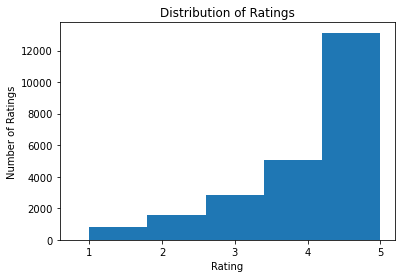

In [12]:
# Distribution of Ratings
print(myDF['Rating'].describe())
plt.hist(myDF['Rating'], bins = 5)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.xlim(0.6, 5.2)
plt.ylabel('Number of Ratings')
plt.show()

In [13]:
# Dealing with null values in review text and title
myDF['Review Text'] = myDF['Review Text'].fillna(' ')
myDF['Title'] = myDF['Title'].fillna(' ')

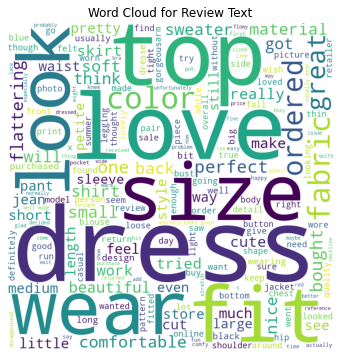

In [14]:
# Word cloud for review text
plt.subplots(figsize=(18,6))
wordcloud = WordCloud(background_color = 'white', width = 900, height = 900).generate(' '.join(myDF['Review Text']))
plt.imshow(wordcloud)
plt.title('Word Cloud for Review Text')
plt.axis('off')
plt.show()

In [15]:
class_rating = myDF.groupby('Class Name').agg({'Rating': np.average})
class_age = myDF.groupby('Class Name').agg({'Age': np.average})
rating_age = myDF.groupby('Rating').agg({'Age': np.average})

print(class_rating.head())
print()
print(class_age.head())
print()
print(rating_age.head())

                  Rating
Class Name              
Blouses         4.154020
Casual bottoms  4.500000
Chemises        4.000000
Dresses         4.150815
Fine gauge      4.260909

                      Age
Class Name               
Blouses         44.252502
Casual bottoms  26.500000
Chemises        38.000000
Dresses         42.114892
Fine gauge      44.730909

              Age
Rating           
1       43.693587
2       42.622364
3       42.158481
4       42.887532
5       43.583124


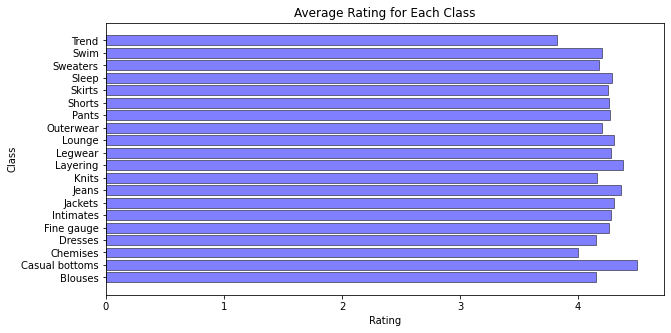

In [16]:
# Plotting Class vs Average Rating
plt.subplots(figsize=(10,5))
plt.barh(class_rating.index, round(class_rating['Rating'], 2), color = 'blue', align = 'center', 
         alpha = 0.5, edgecolor = 'black')
plt.title('Average Rating for Each Class')
plt.ylabel('Class')
plt.xlabel('Rating')
plt.show()

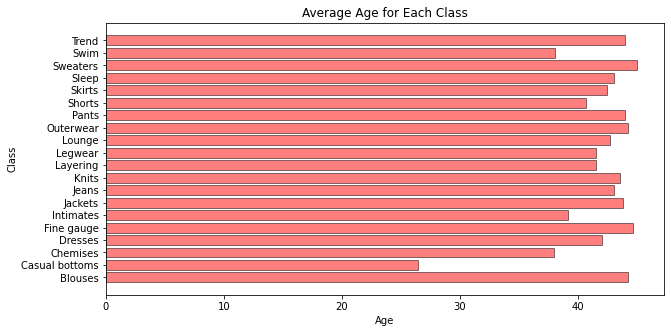

In [17]:
# Plotting Class vs Average Age
plt.subplots(figsize=(10,5))
plt.barh(class_age.index, round(class_age['Age'], 2), color = 'red', align = 'center', 
         alpha = 0.5, edgecolor = 'black')
plt.title('Average Age for Each Class')
plt.ylabel('Class')
plt.xlabel('Age')
plt.show()

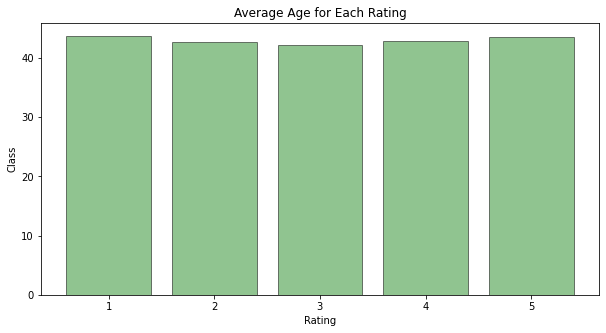

In [18]:
# Plotting Rating vs Age
# after graphing, this plot doesnt really tell us much about the data
plt.subplots(figsize=(10,5))
plt.bar(rating_age.index, round(rating_age['Age'], 2), color = 'forestgreen', align = 'center', 
         alpha = 0.5, edgecolor = 'black')
plt.title('Average Age for Each Rating')
plt.ylabel('Class')
plt.xlabel('Rating')
plt.show()

# Postive Ratings, Negative Ratings, and Neutral

In [19]:
# Sentiment based on ratings
# positive review is based on a rating of 4 or 5
# negative review is based on a rating of 1 or 2
# positive review is based on a rating of 3

print('Positive Rating: ', (myDF['Rating'] > 3).sum())
print('Negative Rating: ', (myDF['Rating'] < 3).sum())
print('Neutral Rating: ', (myDF['Rating'] == 3).sum())
print()
print('Rating = 5: ', (myDF['Rating'] == 5).sum())
print('Rating = 4: ', (myDF['Rating'] == 4).sum())
print('Rating = 3: ', (myDF['Rating'] == 3).sum())
print('Rating = 2: ', (myDF['Rating'] == 2).sum())
print('Rating = 1: ', (myDF['Rating'] == 1).sum())

Positive Rating:  18208
Negative Rating:  2407
Neutral Rating:  2871

Rating = 5:  13131
Rating = 4:  5077
Rating = 3:  2871
Rating = 2:  1565
Rating = 1:  842


In [20]:
# combining title and review text before tokenization
myDF['Review'] = myDF['Title'] + ' ' + myDF['Review Text']
myDF = myDF.drop(labels=['Title', 'Review Text'] , axis=1)
myDF.head()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review
0,0,767,33,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and co...
1,1,1080,34,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happe...
2,2,1077,60,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,3,1049,50,5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4,4,847,47,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...


In [21]:
# using the count vectorizer function to convert collection of text documents to a matrix of word counts
vectorizer = CountVectorizer()
analyzer = vectorizer.build_analyzer()

def wordcount(review):
    token = {}
    if analyzer(review):
        x = {}
        
        # finds counts of words and transforms it to an array
        word = vectorizer.fit_transform([review]).toarray()
        
        # vocab and index 
        v_vocab = vectorizer.vocabulary_
        
        # transforming the dictionaries into tuple pairs
        for y, z in v_vocab.items():
            x[z] = y
            
        for index,i in enumerate(word[0]):
            token[x[index]] = i # token = word:count
    return token

myDF['Word_Count'] = myDF['Review'].apply(wordcount)

myDF.head()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review,Word_Count
0,0,767,33,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and co...,"{'absolutely': 1, 'and': 2, 'comfortable': 1, ..."
1,1,1080,34,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happe...,"{'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below':..."
2,2,1077,60,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...,"{'and': 3, 'be': 1, 'bottom': 1, 'but': 2, 'ch..."
3,3,1049,50,5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps...","{'and': 1, 'but': 1, 'buy': 1, 'compliments': ..."
4,4,847,47,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...,"{'adjustable': 1, 'all': 1, 'and': 1, 'any': 1..."


In [22]:
# This function tells us that 82.2% of the products are recommended by the reviewers and 17.8% are not recommended
# THis will be useful information when we separate the data into train and test data for our model
myDF['Recommended IND'].value_counts(normalize=True)

1    0.822362
0    0.177638
Name: Recommended IND, dtype: float64

In [23]:
# Adding polarity
# polarity is the emotion expressed in a sentence. it can be +, -, or neutral and ranges from -1 (neg) to 1(pos)
myDF['Polarity'] = myDF['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
myDF.head()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review,Word_Count,Polarity
0,0,767,33,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and co...,"{'absolutely': 1, 'and': 2, 'comfortable': 1, ...",0.633333
1,1,1080,34,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happe...,"{'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below':...",0.339583
2,2,1077,60,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...,"{'and': 3, 'be': 1, 'bottom': 1, 'but': 2, 'ch...",0.073209
3,3,1049,50,5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps...","{'and': 1, 'but': 1, 'buy': 1, 'compliments': ...",0.560714
4,4,847,47,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...,"{'adjustable': 1, 'all': 1, 'and': 1, 'any': 1...",0.512891


In [24]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
preprocess_df = myDF.copy()
preprocess_df['Review'] = preprocess_df['Review'].str.lower()
preprocess_df.head()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review,Word_Count,Polarity
0,0,767,33,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful - silky and sexy and co...,"{'absolutely': 1, 'and': 2, 'comfortable': 1, ...",0.633333
1,1,1080,34,5,1,4,General,Dresses,Dresses,love this dress! it's sooo pretty. i happe...,"{'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below':...",0.339583
2,2,1077,60,3,0,0,General,Dresses,Dresses,some major design flaws i had such high hopes ...,"{'and': 3, 'be': 1, 'bottom': 1, 'but': 2, 'ch...",0.073209
3,3,1049,50,5,1,0,General Petite,Bottoms,Pants,"my favorite buy! i love, love, love this jumps...","{'and': 1, 'but': 1, 'buy': 1, 'compliments': ...",0.560714
4,4,847,47,5,1,6,General,Tops,Blouses,flattering shirt this shirt is very flattering...,"{'adjustable': 1, 'all': 1, 'and': 1, 'any': 1...",0.512891


In [26]:
# Removing punctuation
def remove_punctuation(punctuated_string):
    clean_list = [char for char in punctuated_string if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

preprocess_df['Review'] = preprocess_df['Review'].apply(remove_punctuation)
preprocess_df['Review'].head()

0      absolutely wonderful  silky and sexy and com...
1      love this dress  its sooo pretty  i happened...
2    some major design flaws i had such high hopes ...
3    my favorite buy i love love love this jumpsuit...
4    flattering shirt this shirt is very flattering...
Name: Review, dtype: object

In [28]:
# print(stopwords.words('english')[::12])
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
stop.append("i'm")
print(stop)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Raunak\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [29]:
stop_words = []
for elem in stop:
    new_item = remove_punctuation(elem)
    stop_words.append(new_item) 
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'shes', 'her', 'hers', 'herself', 'it', 'its', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'thatll', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', '

In [31]:
# Clothing stopwords
nltk.download('punkt')
clothes_list = ['dress', 'top', 'sweater', 'shirt', 'skirt', 'material', 'white', 'black', 'jeans', 'fabric', 'color',
               'order', 'wear', 'model', 'fit', 'sleeve', 'waist']

# removing stopwords
def remove_stopwords(string):
    string = word_tokenize(string)
    return [word for word in string if word not in stop_words and word not in clothes_list]

preprocess_df['Review'] = preprocess_df['Review'].apply(remove_stopwords)
preprocess_df['Review'].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Raunak\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


0    [absolutely, wonderful, silky, sexy, comfortable]
1    [love, sooo, pretty, happened, find, store, gl...
2    [major, design, flaws, high, hopes, really, wa...
3    [favorite, buy, love, love, love, jumpsuit, fu...
4    [flattering, flattering, due, adjustable, fron...
Name: Review, dtype: object

In [32]:
#s = ['I', 'want', 4, 'apples', 'and', 18, 'bananas'] 
  
def stringer(s):
    return ' '.join([str(elem) for elem in s])

preprocess_df['Review'] = preprocess_df['Review'].apply(stringer)
preprocess_df['Review'].head()

0          absolutely wonderful silky sexy comfortable
1    love sooo pretty happened find store glad bc n...
2    major design flaws high hopes really wanted wo...
3    favorite buy love love love jumpsuit fun flirt...
4    flattering flattering due adjustable front tie...
Name: Review, dtype: object

In [33]:
preprocess_df.head()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review,Word_Count,Polarity
0,0,767,33,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful silky sexy comfortable,"{'absolutely': 1, 'and': 2, 'comfortable': 1, ...",0.633333
1,1,1080,34,5,1,4,General,Dresses,Dresses,love sooo pretty happened find store glad bc n...,"{'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below':...",0.339583
2,2,1077,60,3,0,0,General,Dresses,Dresses,major design flaws high hopes really wanted wo...,"{'and': 3, 'be': 1, 'bottom': 1, 'but': 2, 'ch...",0.073209
3,3,1049,50,5,1,0,General Petite,Bottoms,Pants,favorite buy love love love jumpsuit fun flirt...,"{'and': 1, 'but': 1, 'buy': 1, 'compliments': ...",0.560714
4,4,847,47,5,1,6,General,Tops,Blouses,flattering flattering due adjustable front tie...,"{'adjustable': 1, 'all': 1, 'and': 1, 'any': 1...",0.512891


In [34]:
model_train_data = preprocess_df.copy()
model_train_data.drop(columns = ['Unnamed: 0', 'Clothing ID', 'Age', 'Rating', 'Division Name', 'Department Name', 'Class Name'], inplace=True)
model_train_data.head()

,Recommended IND,Positive Feedback Count,Review,Word_Count,Polarity
0,1,0,absolutely wonderful silky sexy comfortable,"{'absolutely': 1, 'and': 2, 'comfortable': 1, ...",0.633333
1,1,4,love sooo pretty happened find store glad bc n...,"{'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below':...",0.339583
2,0,0,major design flaws high hopes really wanted wo...,"{'and': 3, 'be': 1, 'bottom': 1, 'but': 2, 'ch...",0.073209
3,1,0,favorite buy love love love jumpsuit fun flirt...,"{'and': 1, 'but': 1, 'buy': 1, 'compliments': ...",0.560714
4,1,6,flattering flattering due adjustable front tie...,"{'adjustable': 1, 'all': 1, 'and': 1, 'any': 1...",0.512891


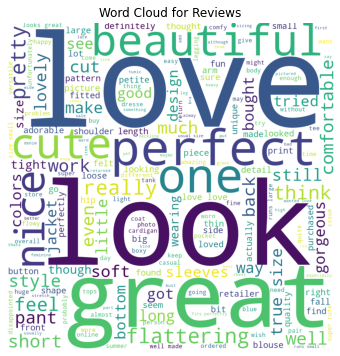

In [35]:
# Word cloud for review text
plt.subplots(figsize=(18,6))
wordcloud1 = WordCloud(background_color = 'white', width = 900, height = 900).generate(' '.join(preprocess_df['Review']))
plt.imshow(wordcloud1)
plt.title('Word Cloud for Reviews')
plt.axis('off')
plt.show()

# Building a model for review text and recommended index

In [36]:
from sklearn.model_selection import train_test_split

indpt_var = model_train_data['Review']
dependent_var = model_train_data['Recommended IND']

X_train, X_test, y_train, y_test, = train_test_split(indpt_var, dependent_var, test_size=0.2, random_state=100)

print('X_train:', len(X_train))
print('X_test:', len(X_test))
print('y_train:', len(y_train))
print('y_test:', len(y_test))

X_train: 18788
X_test: 4698
y_train: 18788
y_test: 4698


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

tvec = TfidfVectorizer()
nb = MultinomialNB()

from sklearn.pipeline import Pipeline

In [38]:
model = Pipeline([('vectorizer', tvec), ('classifier', nb)])

model.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test)

print(confusion_matrix(predictions, y_test))
print('3898 true positives, 768 false negatives, 32 true negatives, 0 false positives')

[[  32    0]
 [ 768 3898]]
3898 true positives, 768 false negatives, 32 true negatives, 0 false positives


In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Accuracy Score: ', accuracy_score(predictions, y_test))
print('Precision Score: ', precision_score(predictions, y_test, average='weighted'))
print('Recall Score', recall_score(predictions, y_test, average='weighted'))

Accuracy Score:  0.8365261813537676
Precision Score:  0.9934610472541506
Recall Score 0.8365261813537676


# Using the model to predict

In [40]:
model_predict = model_train_data.copy()
model_predict.drop(columns = ['Word_Count', 'Polarity', 'Positive Feedback Count'], inplace=True)
model_predict.head()

,Recommended IND,Review
0,1,absolutely wonderful silky sexy comfortable
1,1,love sooo pretty happened find store glad bc n...
2,0,major design flaws high hopes really wanted wo...
3,1,favorite buy love love love jumpsuit fun flirt...
4,1,flattering flattering due adjustable front tie...


In [41]:
model_predict['Prediction'] = model.predict(model_predict['Review'])
model_predict.head()

,Recommended IND,Review,Prediction
0,1,absolutely wonderful silky sexy comfortable,1
1,1,love sooo pretty happened find store glad bc n...,1
2,0,major design flaws high hopes really wanted wo...,1
3,1,favorite buy love love love jumpsuit fun flirt...,1
4,1,flattering flattering due adjustable front tie...,1


In [42]:
print('Recommended: ', (model_predict['Recommended IND'] == 1).sum())
print('Recommended (Prediction): ', (model_predict['Prediction'] == 1).sum())

print('Not Recommended: ', (model_predict['Recommended IND'] == 0).sum())
print('Not Recommended (Prediction): ', (model_predict['Prediction'] == 0).sum())

Recommended:  19314
Recommended (Prediction):  23173
Not Recommended:  4172
Not Recommended (Prediction):  313


# Building a model to see which age groups to target

In [43]:
model_train_data1 = preprocess_df.copy()
model_train_data1.drop(columns = ['Positive Feedback Count', 'Unnamed: 0', 'Clothing ID', 'Word_Count', 'Polarity', 'Review'], inplace=True)
model_train_data1.head()

,Age,Rating,Recommended IND,Division Name,Department Name,Class Name
0,33,4,1,Initmates,Intimate,Intimates
1,34,5,1,General,Dresses,Dresses
2,60,3,0,General,Dresses,Dresses
3,50,5,1,General Petite,Bottoms,Pants
4,47,5,1,General,Tops,Blouses


In [44]:
def sentiment(s):
    if (s == 1):
        return 'yes'
    else: return 'no'
    
preprocess_df['Review'] = preprocess_df['Review'].apply(remove_punctuation)
model_train_data1['Sentiment'] = model_train_data1['Recommended IND'].apply(sentiment)
model_train_data1.head()

,Age,Rating,Recommended IND,Division Name,Department Name,Class Name,Sentiment
0,33,4,1,Initmates,Intimate,Intimates,yes
1,34,5,1,General,Dresses,Dresses,yes
2,60,3,0,General,Dresses,Dresses,no
3,50,5,1,General Petite,Bottoms,Pants,yes
4,47,5,1,General,Tops,Blouses,yes


In [45]:
recommended_age = model_train_data1.loc[model_train_data1['Sentiment'] == 'yes']
recommended_age.head()

,Age,Rating,Recommended IND,Division Name,Department Name,Class Name,Sentiment
0,33,4,1,Initmates,Intimate,Intimates,yes
1,34,5,1,General,Dresses,Dresses,yes
3,50,5,1,General Petite,Bottoms,Pants,yes
4,47,5,1,General,Tops,Blouses,yes
6,39,5,1,General Petite,Tops,Knits,yes


In [46]:
freq_age = recommended_age.pivot_table(index=['Age'], aggfunc='size')
# print(freq_age)
high2low = freq_age.reindex(freq_age.sort_values(ascending=False).index)
print(high2low)

Age
39    1108
35     723
36     695
34     660
41     621
      ... 
93       2
94       2
99       2
90       1
92       1
Length: 77, dtype: int64


In [47]:
print(high2low.head(10))
print(high2low.tail(10))

Age
39    1108
35     723
36     695
34     660
41     621
38     615
37     607
33     564
46     552
32     525
dtype: int64
Age
87    4
18    4
81    3
86    2
91    2
93    2
94    2
99    2
90    1
92    1
dtype: int64


Text(0.5, 1.0, 'Number of Recommendations by Age')

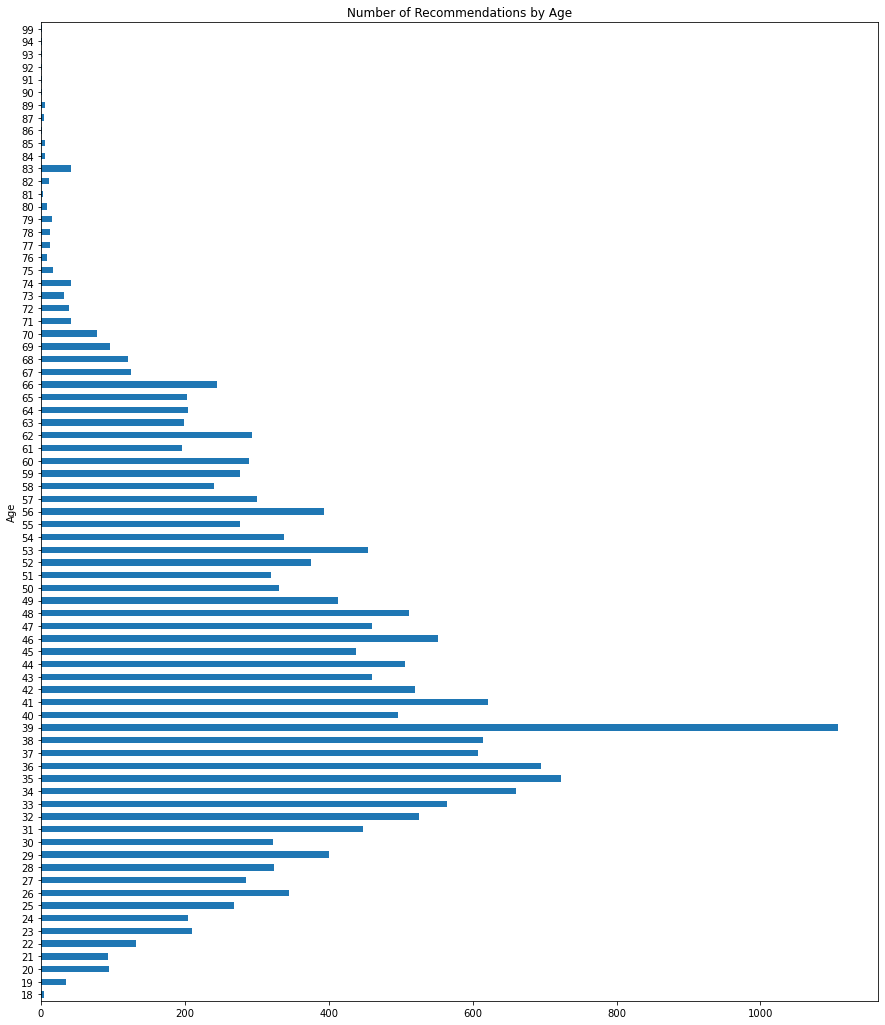

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(15,18))
freq_age.plot(kind = 'barh')
plt.title('Number of Recommendations by Age')

# Seeing which divisions get the most recommendations

In [49]:
freq_division = recommended_age.pivot_table(index=['Division Name'], aggfunc='size')
# print(freq_age)
division_popularity = freq_division.reindex(freq_division.sort_values(ascending=False).index)
print(division_popularity)

Division Name
General           11313
General Petite     6707
Initmates          1280
dtype: int64


Text(0.5, 1.0, 'Number of Recommendations by Division')

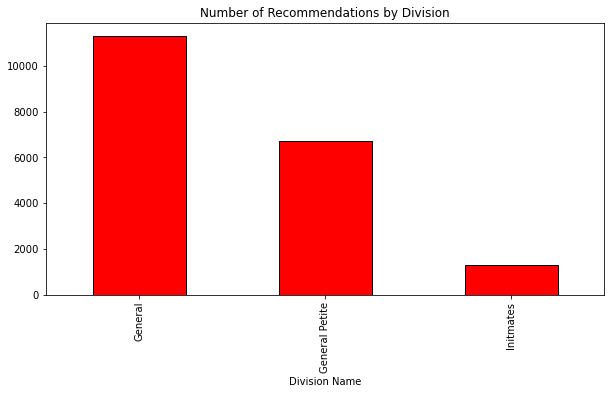

In [50]:
plt.subplots(figsize=(10,5))
freq_division.plot(kind = 'bar', color = 'red', edgecolor='black')
plt.title('Number of Recommendations by Division')

# Seeing which departments get the most recommendations

In [51]:
freq_dept = recommended_age.pivot_table(index=['Department Name'], aggfunc='size')
# print(freq_age)
dept_popularity = freq_dept.reindex(freq_dept.sort_values(ascending=False).index)
print(dept_popularity)

Department Name
Tops        8533
Dresses     5107
Bottoms     3234
Intimate    1475
Jackets      863
Trend         88
dtype: int64


Text(0.5, 1.0, 'Number of Recommendations by Department')

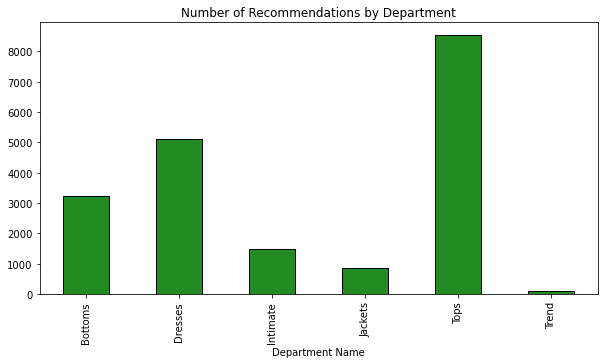

In [52]:
plt.subplots(figsize=(10,5))
freq_dept.plot(kind = 'bar', color = 'forestgreen', edgecolor='black')
plt.title('Number of Recommendations by Department')

# Recommendations by class

In [53]:
freq_class = recommended_age.pivot_table(index=['Class Name'], aggfunc='size')
# print(freq_age)
class_popularity = freq_class.reindex(freq_class.sort_values(ascending=False).index)
print(class_popularity)

Class Name
Dresses           5107
Knits             3960
Blouses           2509
Pants             1156
Sweaters          1143
Jeans             1011
Fine gauge         921
Skirts             799
Jackets            595
Lounge             594
Swim               282
Outerwear          268
Shorts             266
Sleep              195
Legwear            142
Intimates          132
Layering           129
Trend               88
Casual bottoms       2
Chemises             1
dtype: int64


Text(0.5, 1.0, 'Number of Recommendations by Class')

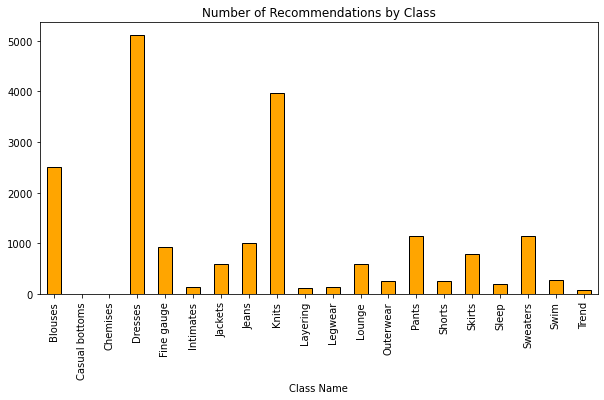

In [54]:
plt.subplots(figsize=(10,5))
freq_class.plot(kind = 'bar', color = 'orange', edgecolor='black')
plt.title('Number of Recommendations by Class')

# Seeing which groups don't resonate with the products

In [55]:
non_rec = model_train_data1.loc[model_train_data1['Sentiment'] == 'no']
non_rec.head()

,Age,Rating,Recommended IND,Division Name,Department Name,Class Name,Sentiment
2,60,3,0,General,Dresses,Dresses,no
5,49,2,0,General,Dresses,Dresses,no
10,53,3,0,General,Dresses,Dresses,no
22,31,2,0,General,Dresses,Dresses,no
25,31,3,0,Initmates,Intimate,Lounge,no


In [56]:
no_rec_age = non_rec.pivot_table(index=['Age'], aggfunc='size')
# print(freq_age)
sorter = no_rec_age.reindex(no_rec_age.sort_values(ascending=False).index)
print(sorter)

Age
35    186
38    165
39    161
46    161
33    161
     ... 
83      1
84      1
85      1
90      1
94      1
Length: 69, dtype: int64


In [57]:
print(sorter.head(10))
print(sorter.tail(10))

Age
35    186
38    165
39    161
46    161
33    161
37    159
36    147
34    144
42    131
31    122
dtype: int64
Age
91    3
76    2
81    2
82    2
80    1
83    1
84    1
85    1
90    1
94    1
dtype: int64


Text(0.5, 1.0, 'Number of Non-Recommendations by Age')

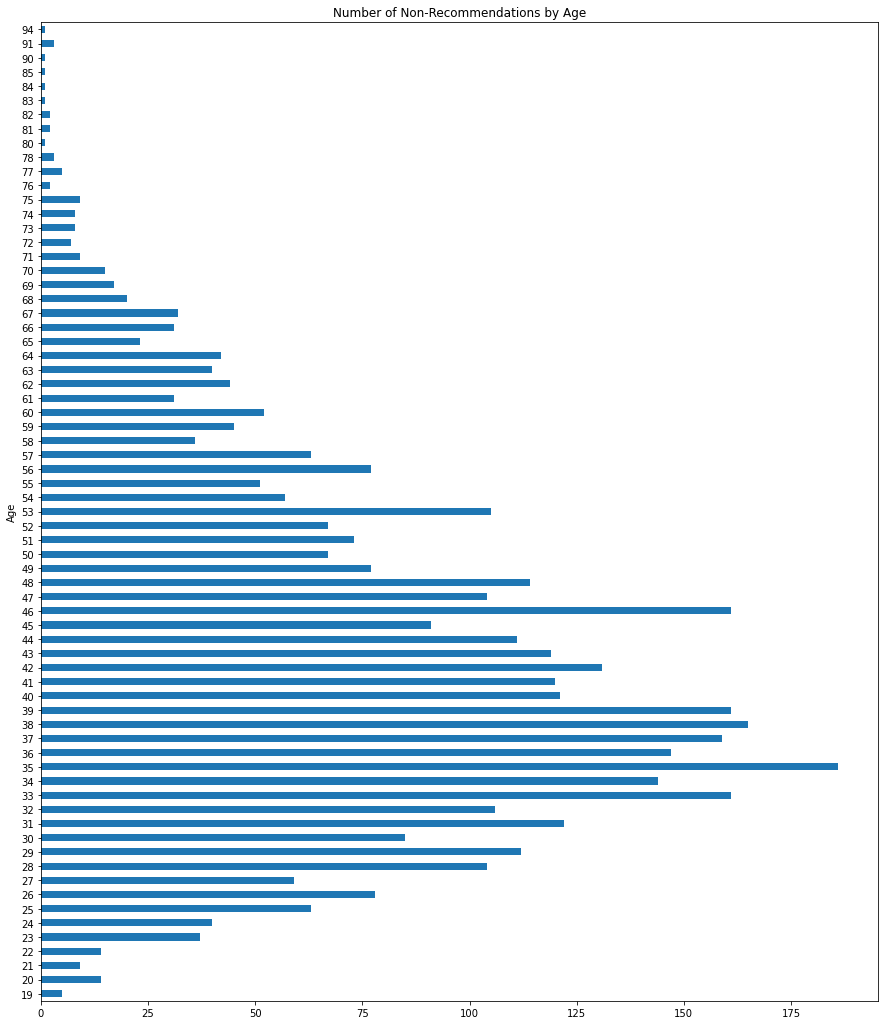

In [58]:
plt.subplots(figsize=(15,18))
no_rec_age.plot(kind = 'barh')
plt.title('Number of Non-Recommendations by Age')

# Seeing which divisions get the most non-recommendations

In [59]:
no_rec_division = non_rec.pivot_table(index=['Division Name'], aggfunc='size')
# print(freq_age)
sorter1 = no_rec_division.reindex(no_rec_division.sort_values(ascending=False).index)
print(sorter1)

Division Name
General           2537
General Petite    1413
Initmates          222
dtype: int64


Text(0.5, 1.0, 'Number of Non-Recommendations by Division')

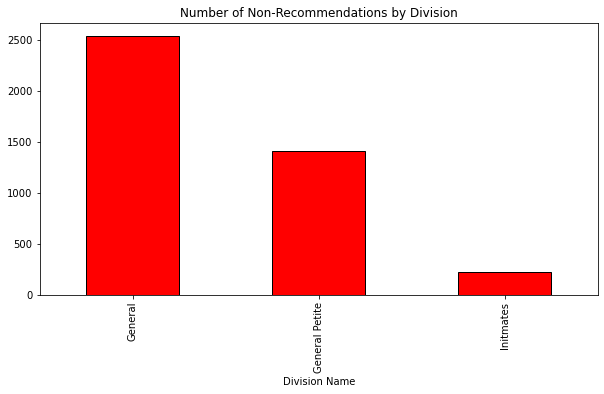

In [60]:
plt.subplots(figsize=(10,5))
no_rec_division.plot(kind = 'bar', color = 'red', edgecolor='black')
plt.title('Number of Non-Recommendations by Division')

# Seeing which departments get the most non recommendations

In [61]:
no_rec_dept = non_rec.pivot_table(index=['Department Name'], aggfunc='size')
# print(freq_age)
sorter2 = no_rec_dept.reindex(no_rec_dept.sort_values(ascending=False).index)
print(sorter2)

Department Name
Tops        1935
Dresses     1212
Bottoms      565
Intimate     260
Jackets      169
Trend         31
dtype: int64


Text(0.5, 1.0, 'Number of Non-Recommendations by Department')

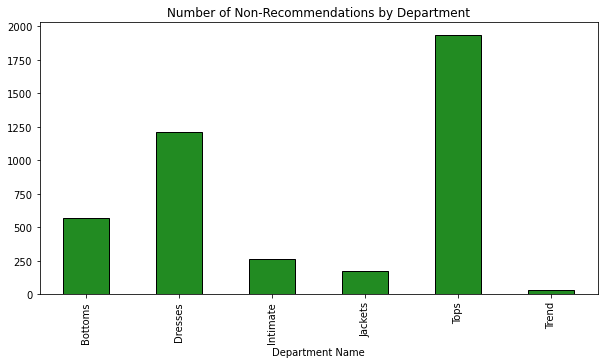

In [62]:
plt.subplots(figsize=(10,5))
no_rec_dept.plot(kind = 'bar', color = 'forestgreen', edgecolor='black')
plt.title('Number of Non-Recommendations by Department')

# Non Recommendations by class

In [63]:
no_rec_class = non_rec.pivot_table(index=['Class Name'], aggfunc='size')
# print(freq_age)
sorter3 = no_rec_class.reindex(no_rec_class.sort_values(ascending=False).index)
print(sorter3)

Class Name
Dresses       1212
Knits          883
Blouses        588
Sweaters       285
Pants          232
Fine gauge     179
Skirts         146
Jeans          136
Jackets        109
Lounge          97
Swim            68
Outerwear       60
Shorts          51
Sleep           33
Trend           31
Legwear         23
Intimates       22
Layering        17
dtype: int64


Text(0.5, 1.0, 'Number of Non-Recommendations by Class')

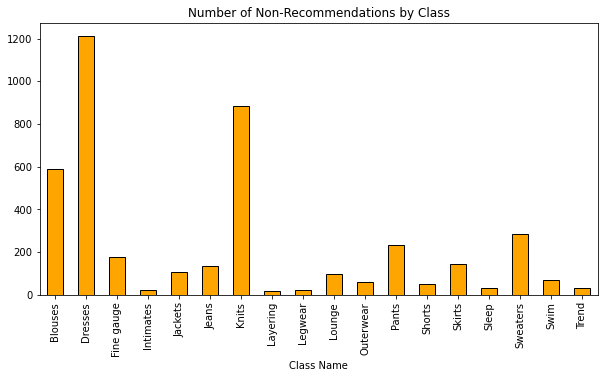

In [64]:
plt.subplots(figsize=(10,5))
no_rec_class.plot(kind = 'bar', color = 'orange', edgecolor='black')
plt.title('Number of Non-Recommendations by Class')

# Sentiment by Polarity

In [65]:
def rating(s):
    if s > 0.1:
        return 'yes'
    else: return 'no'
    
rating_data = preprocess_df.copy()
rating_data.drop(columns = ['Unnamed: 0', 'Clothing ID', 'Positive Feedback Count', 'Division Name', 'Department Name', 'Class Name', 'Word_Count'], inplace = True)
#rating_data.head()
rating_data['Sentiment'] = rating_data['Polarity'].apply(rating)
rating_data.head()

,Age,Rating,Recommended IND,Review,Polarity,Sentiment
0,33,4,1,absolutely wonderful silky sexy comfortable,0.633333,yes
1,34,5,1,love sooo pretty happened find store glad bc n...,0.339583,yes
2,60,3,0,major design flaws high hopes really wanted wo...,0.073209,no
3,50,5,1,favorite buy love love love jumpsuit fun flirt...,0.560714,yes
4,47,5,1,flattering flattering due adjustable front tie...,0.512891,yes


In [66]:
rating_data['Recommended IND'].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

In [67]:
rating_data['Sentiment'].value_counts()

yes    19199
no      4287
Name: Sentiment, dtype: int64

In [71]:
jeans = myDF[['Class Name', 'Review']]
jeans = jeans.loc[jeans["Class Name"] == "Jeans"]
jeans.head()

,Class Name,Review
224,Jeans,"The inseam is advertised as 28"", but they ar..."
225,Jeans,Gorgeous I love paige brand pants-they are sof...
229,Jeans,Why so long? Petite pants hsould be able to fi...
233,Jeans,"Must have, right on trend, but still classic T..."
248,Jeans,


In [73]:
# Dealing with null values in review text 
jeans['Review Text'] = jeans['Review'].fillna(' ')

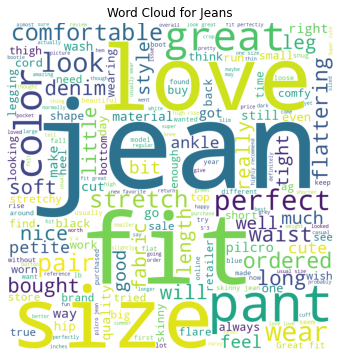

In [74]:
# Word cloud for review text
plt.subplots(figsize=(18,6))
wordcloud_jeans = WordCloud(background_color = 'white', width = 900, height = 900).generate(' '.join(jeans['Review Text']))
plt.imshow(wordcloud_jeans)
plt.title('Word Cloud for Jeans')
plt.axis('off')
plt.show()